# View Fake Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from harp_resources import process, utils
from analysis_functions import *
import matplotlib.patches as patches
import seaborn as sns


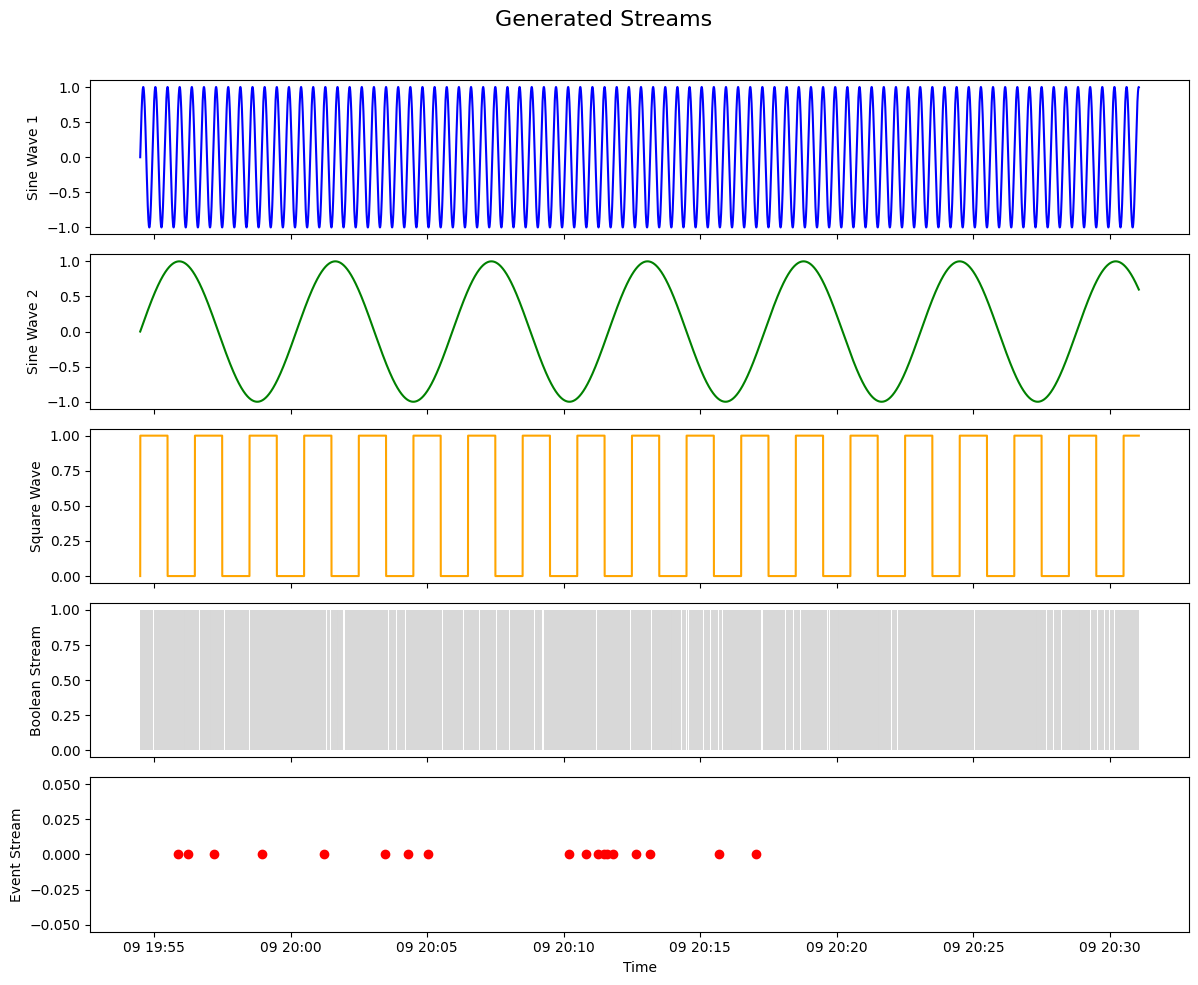

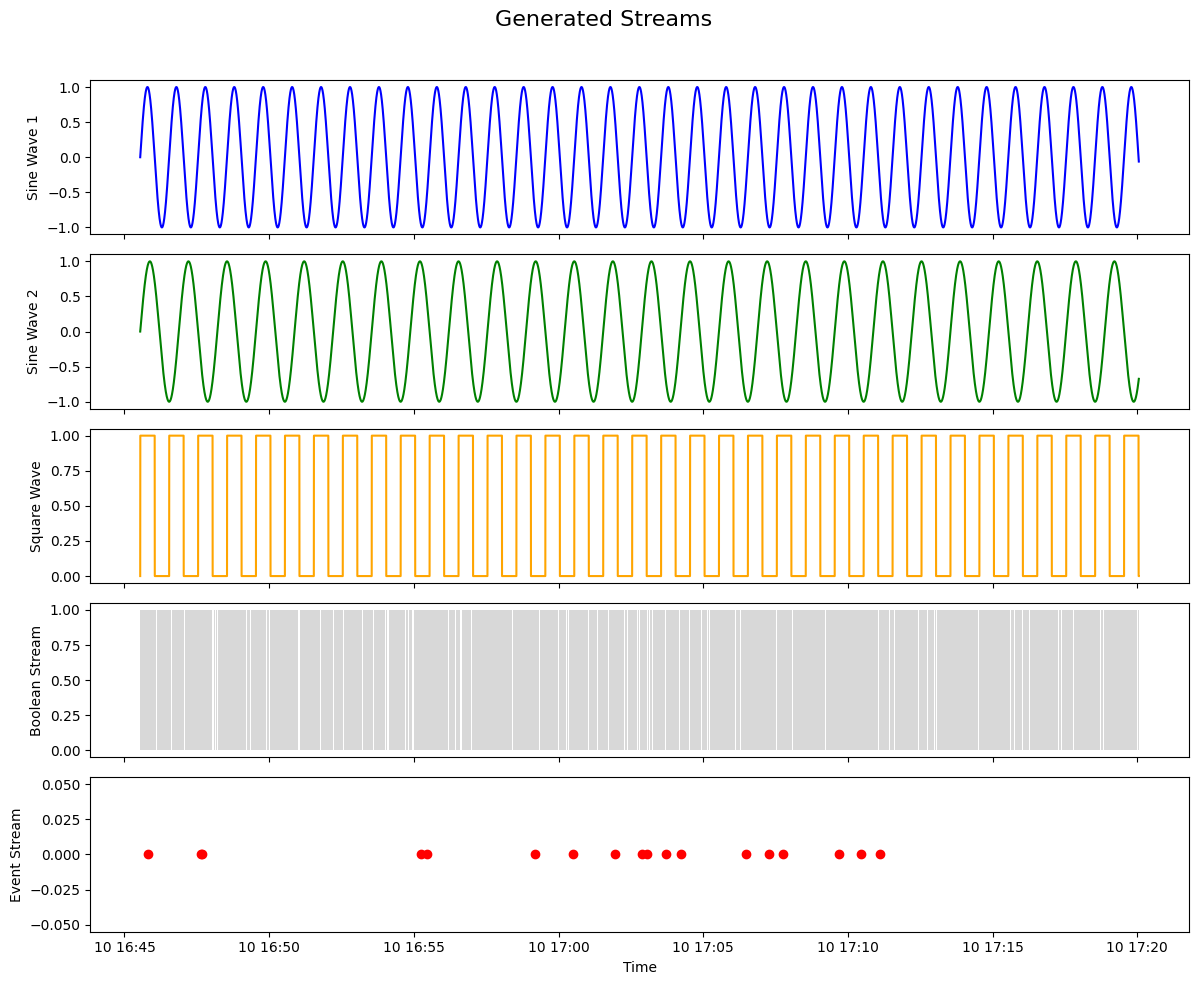

In [2]:
import contextlib
import io
#pip install import-ipynb
import import_ipynb
# Create a context manager to suppress output
f = io.StringIO()
with contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
    from Test_streams_make_and_save import df_1, df_2



In [3]:
Fake_1 = pd.read_csv('Fake_data_session1.csv', dtype=dtype_dict)
Fake_2 = pd.read_csv('Fake_data_session2.csv', dtype=dtype_dict)

In [4]:
# Chaning event name to halt and making it so that its True when there is a halt
#Fake_1.loc[:, 'event'] = Fake_1['event'].replace({False: True, True: False})
Fake_1.rename(columns = {'event': 'halt'}, inplace = True)
Fake_2.rename(columns = {'event': 'halt'}, inplace = True)


In [5]:
#Make sure the index provides inforamtion of seconds since start
Fake_1.set_index('Seconds', inplace=True)
Fake_2.set_index('Seconds', inplace=True)
# Theres only photomotry information from 15 seconds due to bleaching
Fake_1 = Fake_1.loc[ Fake_1.index>30]
Fake_2 = Fake_2.loc[ Fake_2.index>30]

In [6]:
def view_session_mouse(mousedata_dict, mouse):
    print('\033[1m' + f'Plotted traces for {mouse}' + '\033[0m')
    
    plotlist = ['470_dfF', 'movementX']
    fig, ax = plt.subplots(len(plotlist), len(mousedata_dict), figsize=(15, 10), sharex=True)  # sharex=True for a shared x-axis
    
    for s, (session, session_data) in enumerate(mousedata_dict.items()):
        
        # Getting the mouse-specific data from the session
        time = session_data.index
        event = session_data.halt
        color = ['forestgreen', 'blue']
    
        # Iterate over the traces in plotlist and plot each on a new row
        for i, trace in enumerate(plotlist):
            ax[i, s].plot(time, session_data[trace], color=color[i])
            ax[i, s].set_title(f"{trace} - {session}")
            
            # Plot shaded areas for each halt event
            ymin, ymax = ax[i, s].get_ylim()
            #halt = ax[i, s].fill_between(time, ymin, ymax, where=event, color='grey', alpha=0.3)
            halt = ax[i, s].fill_between(Fake_1['halt'].index, 0, 1, where=Fake_1['halt'].values, 
                     facecolor="gray", alpha=0.3)
        
        # Plot annotations for different blocks
        block_colors = ['lightsteelblue', 'lightcoral', 'forestgreen']
        colorcount = 0
        for col in session_data:
            if '_block' in col:
                start = session_data.loc[session_data[col] == True].index[0]
                end = session_data.loc[session_data[col] == True].index[-1]
        
                min_time, max_time = ax[0, s].get_xlim()
                norm_start = norm(start, min_time, max_time)
                norm_end = norm(end, min_time, max_time)
                
                # Add rectangles with alpha=0.1 to each trace subplot in this session
                for i in range(len(plotlist)):
                    ax[i, s].add_patch(Rectangle(
                        (norm_start, 0), norm_end - norm_start, 1, 
                        facecolor=block_colors[colorcount], alpha=0.1, clip_on=False, transform=ax[i, s].transAxes
                    ))

                # Add labels at the bottom of the last plot
                ax[-1, s].text(norm_start + 0.05, -0.2, col, transform=ax[-1, s].transAxes,
                               fontsize=10, verticalalignment='top')
                ax[-1, s].add_patch(Rectangle(
                    (norm_start, -0.15), norm_end - norm_start, -0.2, 
                    facecolor=block_colors[colorcount], alpha=0.5, clip_on=False, transform=ax[-1, s].transAxes))
                
                colorcount += 1

    halt.set_label('halts')
    # Create one legend for the figure
    fig.legend(fontsize=12)
    
    # Update font size and layout
    plt.rcParams.update({'font.size': 10})
    fig.tight_layout(pad=1.08)
    plt.show()


In [7]:
#Check that the same mice are in the datsets
print(Fake_1.mouseID.unique())
print(Fake_2.mouseID.unique())


['B0M0']
['B0M0']


Plotted traces for B0M0


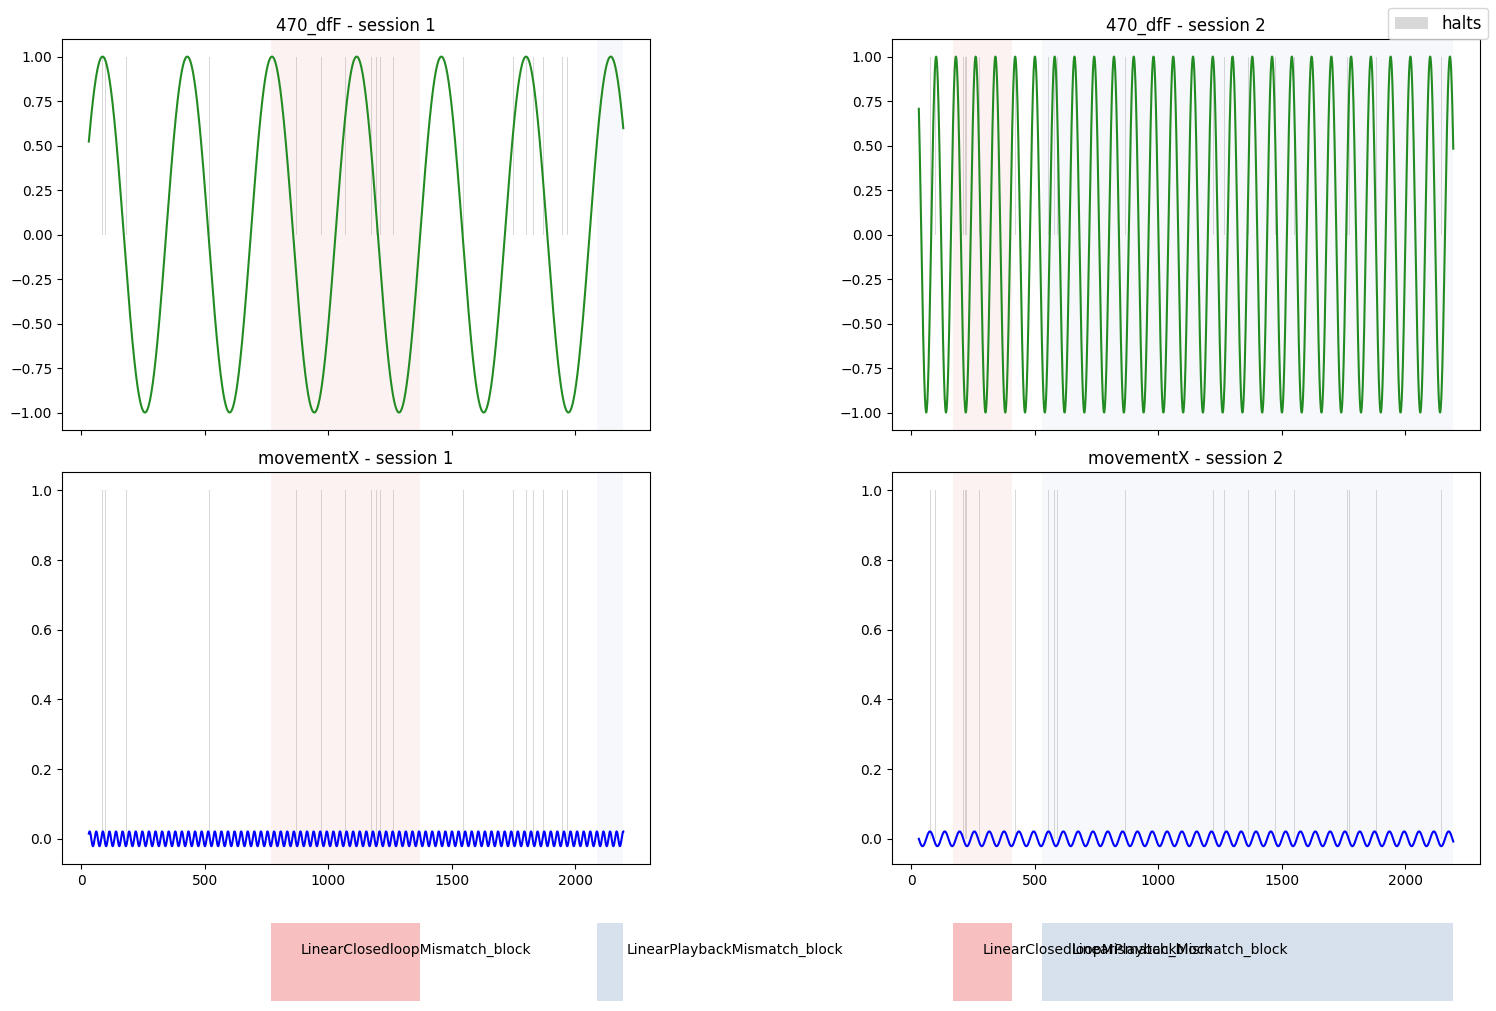

In [8]:
for mouse in Fake_1.mouseID.unique():
    mousedata = {'session 1':Fake_1.loc[Fake_1.mouseID == mouse], 'session 2':Fake_2.loc[Fake_2.mouseID == mouse]}
    view_session_mouse(mousedata, mouse)

In [9]:
df_1.Seconds -762869.6790

1904-01-09 19:54:29.679000       0.0000
1904-01-09 19:54:29.679100       0.0001
1904-01-09 19:54:29.679200       0.0002
1904-01-09 19:54:29.679300       0.0003
1904-01-09 19:54:29.679400       0.0004
                                ...    
1904-01-09 20:31:03.268600    2193.5896
1904-01-09 20:31:03.268700    2193.5897
1904-01-09 20:31:03.268800    2193.5898
1904-01-09 20:31:03.268900    2193.5899
1904-01-09 20:31:03.269000    2193.5900
Freq: 100us, Name: Seconds, Length: 21935901, dtype: float64

In [10]:
fake_df_1 = Fake_1[['movementX', 'movementY', '470_dfF', 'halt']].copy()
fake_df_2 = Fake_2[['movementX', 'movementY', '470_dfF', 'halt']].copy()

In [11]:
fake_df_2


,movementX,movementY,470_dfF,halt
Seconds,,,,
30.001,-0.000003,0.0,0.707026,False
30.002,-0.000005,0.0,0.706971,False
30.003,-0.000008,0.0,0.706915,False
30.004,-0.000010,0.0,0.706860,True
30.005,-0.000012,0.0,0.706804,False
...,...,...,...,...
2193.586,-0.007764,0.0,0.482686,False
2193.587,-0.007766,0.0,0.482617,True
2193.588,-0.007768,0.0,0.482548,False


In [12]:
df_2

,OpticalTrackingRead0X(46),OpticalTrackingRead0Y(46),CH1-470,Photodiode,Seconds
1904-01-10 16:45:32.679000,0.000000,0.0,0.000000,True,837932.6790
1904-01-10 16:45:32.679100,0.000010,1.0,0.000008,True,837932.6791
1904-01-10 16:45:32.679200,0.000021,1.0,0.000016,True,837932.6792
1904-01-10 16:45:32.679300,0.000031,1.0,0.000024,True,837932.6793
1904-01-10 16:45:32.679400,0.000042,1.0,0.000031,True,837932.6794
...,...,...,...,...,...
1904-01-10 17:20:03.268600,-0.061704,0.0,-0.673616,True,840003.2686
1904-01-10 17:20:03.268700,-0.061714,0.0,-0.673611,True,840003.2687
1904-01-10 17:20:03.268800,-0.061724,0.0,-0.673605,True,840003.2688
1904-01-10 17:20:03.268900,-0.061735,0.0,-0.673599,False,840003.2689


In [13]:
def verify_transformation(original_df, new_df):
    # 1. Verify column mappings
    column_mapping = {
        'OpticalTrackingRead0X(46)': 'movementX',
        'OpticalTrackingRead0Y(46)': 'movementY',
        'CH1-470': '470_dfF',
        'Photodiode': 'halt'
    }
    for original_col, new_col in column_mapping.items():
        assert new_col in new_df.columns, f"Missing column: {new_col}"
        print(f"Column mapping verified: {original_col} -> {new_col}")

    # 2. Filter out the first 30 seconds from the original dataframe
    start_time = original_df['Seconds'].iloc[0] + 30.000
    filtered_original_df = original_df[original_df['Seconds'] >= start_time]

    print(f"Original dataframe filtered to start at {start_time} seconds.")

    # Shift the Seconds column to align with the new dataframe's index
    filtered_original_df['Adjusted_Seconds'] = filtered_original_df['Seconds'] - start_time

    # 3. Verify downsampling dynamically
    # Match the time range of new_df in filtered_original_df
    filtered_time_range = filtered_original_df[
        (filtered_original_df['Adjusted_Seconds'] >= new_df.index.min()) &
        (filtered_original_df['Adjusted_Seconds'] <= new_df.index.max())
    ]

    print(f"Filtered original data to time range: {new_df.index.min()} to {new_df.index.max()}.")

    # Calculate the expected number of rows based on step sizes in the new dataframe
    observed_interval = np.mean(np.diff(new_df.index))  # Actual interval in new_df
    expected_rows = int((filtered_time_range['Adjusted_Seconds'].max() - filtered_time_range['Adjusted_Seconds'].min()) / observed_interval) + 1

    print(f"Observed interval: {observed_interval} seconds")
    print(f"Expected rows: {expected_rows}, Actual rows in new_df: {len(new_df)}")

    assert abs(len(new_df) - expected_rows) <= 1, f"Downsampling row count mismatch: Expected {expected_rows}, Got {len(new_df)}"

    print("Downsampling verified.")

    # 4. Validate data integrity using interpolation
    # Interpolate original data to the new index
    interpolated_df = (
        filtered_time_range
        .set_index('Adjusted_Seconds')
        .reindex(new_df.index)
        .interpolate()
    )

    # Compare interpolated data with new dataframe
    for original_col, new_col in column_mapping.items():
        difference = np.abs(interpolated_df[original_col] - new_df[new_col])
        max_diff = difference.max()
        assert max_diff < 1e-3, f"Data integrity check failed for {new_col}: Max difference = {max_diff}"
        print(f"Data integrity check passed for {new_col}: Max difference = {max_diff:.6f}")

    print("All verification checks passed!")



In [14]:
verify_transformation(df_2,fake_df_2)

Column mapping verified: OpticalTrackingRead0X(46) -> movementX
Column mapping verified: OpticalTrackingRead0Y(46) -> movementY
Column mapping verified: CH1-470 -> 470_dfF
Column mapping verified: Photodiode -> halt
Original dataframe filtered to start at 837962.679 seconds.


/var/folders/j0/v9b_1b8d44l7jr8z9bvwrg4h0000gp/T/ipykernel_40531/1052430949.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original_df['Adjusted_Seconds'] = filtered_original_df['Seconds'] - start_time


Filtered original data to time range: 30.001 to 2193.59.
Observed interval: 0.001 seconds
Expected rows: 2010589, Actual rows in new_df: 2163590


AssertionError: Downsampling row count mismatch: Expected 2010589, Got 2163590

In [15]:
2010589 - 2163590

-153001

In [45]:
153001/1000


153.001